In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import yfinance as yf
from dateutil.relativedelta import relativedelta

In [2]:
Stardate=datetime(2005, 1, 1)
Enddate=datetime(2011, 12, 31)

tck_DJ_data = yf.download('^DJI', Stardate-timedelta(weeks=1),Enddate)
Close_DJ_data=pd.DataFrame(tck_DJ_data['Close'])


[*********************100%***********************]  1 of 1 completed


In [3]:
Close_DJ_data=  Close_DJ_data.reset_index()
Close_DJ_data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [4]:
Close_DJ_data.head(5)

,Date,Close
0,2004-12-27,10776.129883
1,2004-12-28,10854.540039
2,2004-12-29,10829.190430
3,2004-12-30,10800.299805
4,2004-12-31,10783.009766


In [5]:
print(datetime(2004,12, 27)==Close_DJ_data['Date'][0])

True


In [6]:
Close_DJ_data = (Close_DJ_data.set_index('Date')
      .reindex(pd.date_range(Stardate-timedelta(weeks=1), Enddate, freq='D'))
      .rename_axis(['Date'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [7]:
paper = pd.read_csv('PreisMoatStanley2013.dat',delimiter=' ', parse_dates =[0,1,100,101] )


In [9]:
df_gt=pd.DataFrame({'GoogleWE':paper['Google End Date'],'debt':paper['debt'].astype(np.float64),\
    'DJIADate':paper['DJIA Date'],'DJIAClose':paper['DJIA Closing Price'].astype(np.float64)})


In [10]:
df_gt = (df_gt.set_index('GoogleWE')
      .reindex(pd.date_range(Stardate-timedelta(weeks=1), Enddate, freq='D'))
      .rename_axis(['GoogleWE'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [11]:
inital_date=datetime(2005,1,3)
for i in range(5):
    print(inital_date-timedelta(weeks=i))

2005-01-03 00:00:00
2004-12-27 00:00:00
2004-12-20 00:00:00
2004-12-13 00:00:00
2004-12-06 00:00:00


In [12]:
df_gt.head()

,GoogleWE,debt,DJIADate,DJIAClose
0,2004-12-25,0.133333,2004-12-27,10776.13
1,2004-12-26,0.133333,2004-12-27,10776.13
2,2004-12-27,0.133333,2004-12-27,10776.13
3,2004-12-28,0.133333,2004-12-27,10776.13
4,2004-12-29,0.133333,2004-12-27,10776.13


In [13]:
df_gt.dtypes

GoogleWE     datetime64[ns]
debt                float64
DJIADate     datetime64[ns]
DJIAClose           float64
dtype: object

In [14]:
#Close_DJ_data=Close_DJ_data.loc[Close_DJ_data['Date']>=Stardate+timedelta(days=2)]
#df_gt=df_gt.loc[df_gt['GoogleWE']>=Stardate+timedelta(days=2)]

In [14]:
Cnsl_db = pd.merge(Close_DJ_data, df_gt, how='inner', left_on = 'Date', right_on='GoogleWE')

In [15]:
Cnsl_db=Cnsl_db.loc[Cnsl_db['Date']>=Stardate+timedelta(days=2)]

In [16]:
Cnsl_db.head(5)

,Date,Close,GoogleWE,debt,DJIADate,DJIAClose
7,2005-01-03,10729.429688,2005-01-03,0.16,2005-01-03,10729.43
8,2005-01-04,10630.780273,2005-01-04,0.16,2005-01-03,10729.43
9,2005-01-05,10597.830078,2005-01-05,0.16,2005-01-03,10729.43
10,2005-01-06,10622.879883,2005-01-06,0.16,2005-01-03,10729.43
11,2005-01-07,10603.959961,2005-01-07,0.16,2005-01-03,10729.43


In [17]:
Cnsl_db2 = (Cnsl_db.set_index('Date')
      .reindex(pd.date_range(Stardate+timedelta(days=2), Enddate, freq='W-MON'))
      .rename_axis(['Date'])
      .dropna()
      .reset_index())

<AxesSubplot:xlabel='Date'>

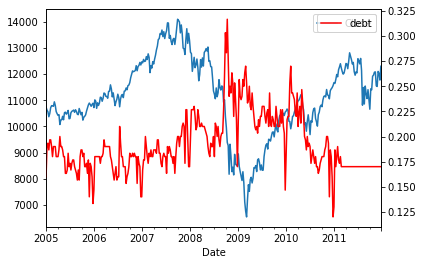

In [18]:
ax = Cnsl_db2.plot('Date','Close')
ax1 = ax.twinx()
Cnsl_db2.plot('Date','debt',ax=ax1, color='r')

In [31]:
Google_trends=pd.read_csv('debt_google_trend.csv')
Google_trends['Mes']=Google_trends['Mes'].astype('datetime64[ns]')

In [32]:
Google_trends = (Google_trends.set_index('Mes')
      .reindex(pd.date_range(Stardate-timedelta(weeks=1), Enddate, freq='D'))
      .rename_axis(['Mes'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [33]:
Cnsl_db_Gtr = pd.merge(Close_DJ_data, Google_trends, how='inner', left_on = 'Date', right_on='Mes')

In [34]:
Cnsl_db_Gtr=Cnsl_db_Gtr.loc[Cnsl_db_Gtr['Date']>=Stardate+timedelta(days=2)]

In [35]:
Cnsl_db_Gtr2 = (Cnsl_db_Gtr.set_index('Date')
      .reindex(pd.date_range(Stardate+timedelta(days=2), Enddate, freq='W-MON'))
      .rename_axis(['Date'])
      .dropna()
      .reset_index())

<AxesSubplot:xlabel='Date'>

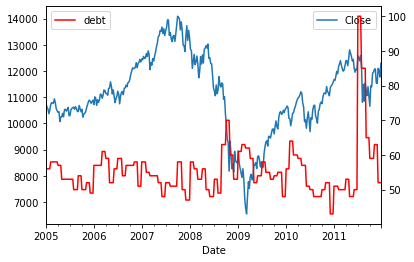

In [40]:
ax = Cnsl_db_Gtr2.plot('Date','Close')
ax1 = ax.twinx()
Cnsl_db_Gtr2.plot('Date','debt',ax=ax1, color='r')